# Table of Contents
 <p><div class="lev1"><a href="#GrIS-winter-GPS-velocity-(2011---2017)">GrIS winter GPS velocity (2011 - 2017)</a></div><div class="lev1"><a href="#1.-Summary">1. Summary</a></div><div class="lev1"><a href="#2.-Site-27km-11">2. Site 27km-11</a></div><div class="lev3"><a href="#Close-up,-winter-2011-12">Close-up, winter 2011-12</a></div><div class="lev3"><a href="#Close-up,-winter-2012-13">Close-up, winter 2012-13</a></div><div class="lev1"><a href="#3.-Site-46km-11">3. Site 46km-11</a></div><div class="lev3"><a href="#Close-up,-fall-2011">Close-up, fall 2011</a></div><div class="lev3"><a href="#Close-up,-winter-2012-13">Close-up, winter 2012-13</a></div><div class="lev1"><a href="#4.-Site-27km-12">4. Site 27km-12</a></div><div class="lev1"><a href="#5.-Site-33km-14-(center)">5. Site 33km-14 (center)</a></div><div class="lev3"><a href="#Close-up,-winter-2014-15">Close-up, winter 2014-15</a></div><div class="lev3"><a href="#Close-up,-winter-2015-16">Close-up, winter 2015-16</a></div><div class="lev3"><a href="#Close-up,-winter-2016-17">Close-up, winter 2016-17</a></div>

In [92]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View raw code"></form>''')

Use toggle button to view raw code if desired.

In [93]:
%matplotlib inline

# GrIS winter GPS velocity (2011 - 2017)

**Prepared for UM QSSI**

**Patrick Wright, *Inversion Labs***

**January 26, 2018**

# 1. Summary

We have winter records from 8 sites for 5 winter seasons (missing 2013-14 winter record). 4 winter records either have only the fall or spring, so I have used linear trends to project the rates forward/backward in time to get estimates for start/end velocity, total increase, total duration, and acceleration rate. When there is no spring record, I project the trends to June 1st. 

All GPS records use 30-minute bin size, 12-hr position smoothing, 12-hr velocity calculations, and 12-hr velocity smoothing. 

See table for winter statistics:

[Link to Table](https://docs.google.com/spreadsheets/d/14S9e9kbzq1MX9VfMp6zBsX4sCdVMoHDoDo3zHULRU-s/edit?usp=sharing)

Averages (8 winter records):

* Ave starting velocity: 88.5 m/yr
* Ave end velocity: 109.3 m/yr
* Ave increase: 20.8 m/yr
* Ave acceleration (slope): 0.08 m/yr/day

**Preliminary Conclusions**

OBSERVED BEHAVIOR:

* Winter speed-up can be very closely approximated with a linear trend.
* Increase in total melt over preceeding summer leads to decreased starting velocity (only 4 summers with complete melt records, but holds true for all 4 cases)
* Slope of linear trends (ave acceleration rate) mostly vary between 0.03 - 0.08 m/yr/day (exception to 2011-12 winter at 46km-11, which is 0.22 m/yr/day, projected rate from the fall).
* Block site has most continuous year to year records. This site shows very consistent total increase and average acceleration rates, despite being preceeded by both relatively high melt and low melt summers.

DISCUSSION POINTS:

* Linear trends indicate steady-state conditions. From N. Maier result's, we know motion is almost totally sliding. Acceleration likely results from gradual addition of water at the bed from geothermal and frictional melt. We should quantify these additions and assess if this theory is reasonable.

* There is some variability in slope (acceleration rate), and it is unclear what is controlling this year to year, and site to site. However, once the rate is set, it is very consistent over winter. Block site demonstrates that the preceeding summer's melt (corresponding to extent of drainage development) does not necessarily correlate to differences in over-winter acceleration rate. But it does control the starting velocity.

* Geothermal heat over winter is consistent, but frictional melting will increase with velocity. Is this driving acceleration?

* The characteristics of the fall "shutdown" seem like a prime candidate for setting up bed conditions that lead to faster or slower acceleration (as Harper has mentioned). If you have a flash freeze, or slow shutdown, or big melt event late in season, etc.... these will influence the amount of water storage going into winter, and consequently how coupled / de-coupled the bed is. If the bed starts with a larger volume of distributed water, will it support faster acceleration rates?

* In general, these findings support Nienow group (high melt summers lead towards lower starting velocity for winter, and overall slower winters, thus "regulated" annual velocity). However, the amount of recovery in velocity that occurs over-winter could potentially have a large effect (example: rapid acceleration associated with the projected record for site 46km-11.... if we trust the projection, then there is a huge amount of recovery during this winter). 

**Conditions in the fall could set up for relatively faster or slower over-winter recovery, which could lead towards more or less "regulation".**

**How do we quantify or categorize the fall behavior, and see if it relates to acceleration rate? What else could be controlling acceleration rate variability?**
 

# 2. Site 27km-11

For all plots below, solid line indicates linear-trend from data, dashed line indicates projected trend. If data is present for both fall and spring, the projected trend from the fall is aligned to intersect with the ending velocity in spring.

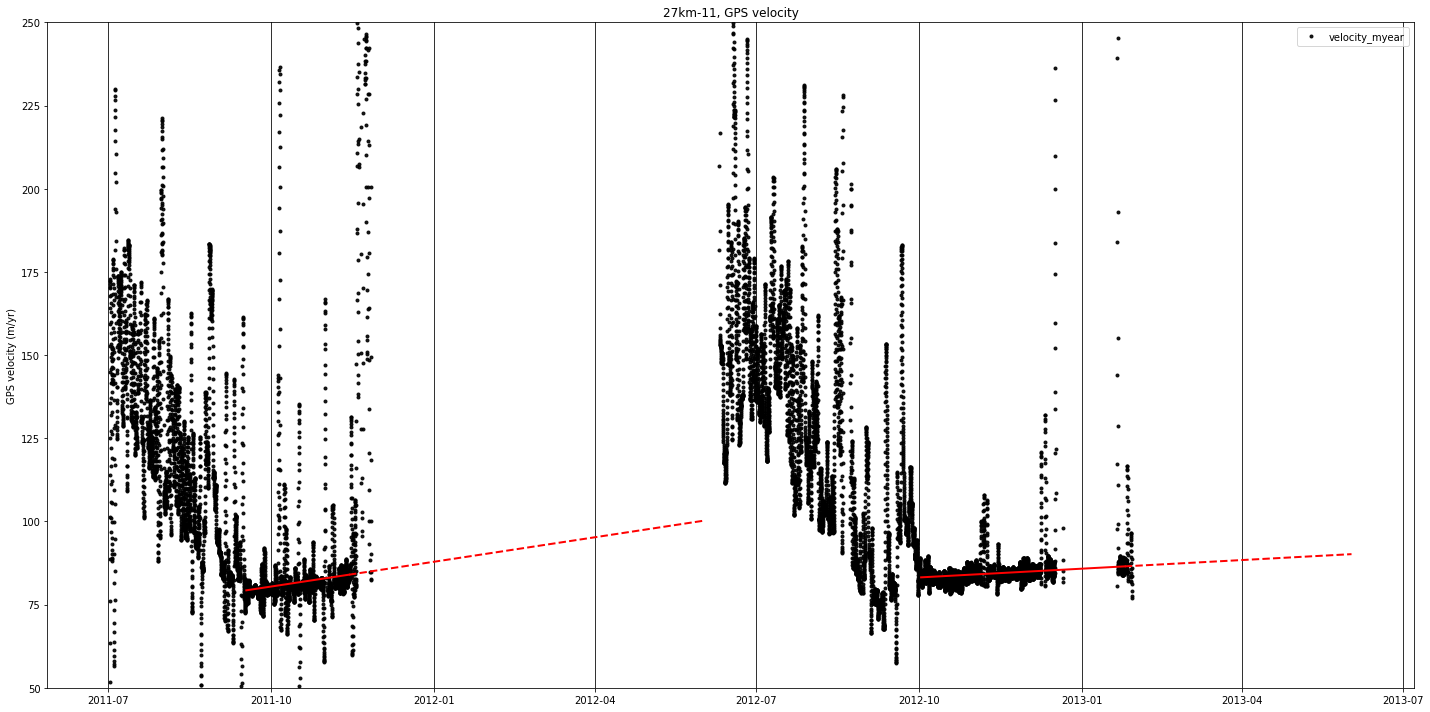

In [94]:
#!/usr/bin/env python

"""
Analysis of Winter GPS
Patrick Wright, Inversion Labs
Job: UM QSSI
Jan. 2018
"""

import datetime as dt
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
#from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import rcParams
from dateutil.relativedelta import relativedelta
import pylab
from IPython import embed
from math import factorial
from datetime import timedelta

# set index of dataframes to datetime:
def set_index(df):
  index = pd.to_datetime(df.Datetime)
  df = df.set_index(index)
  df.index.rename('Datetime_index', inplace=True)
  df = df.drop('Datetime', axis=1)
  return df

# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

site = '27km-11'

vel1 = pd.read_csv('velocity/processed_winter/27km-11_velocity_winter.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# ------------------------------------------------------------------------------
t1 = pd.to_datetime('2011-09-17')
t2 = pd.to_datetime('2011-11-14')

y1 = 79.3
y2 = 84.

x_1 = [t1, t2]
y_1 = [y1, y2]

m = (y2-y1) / (pd.Timedelta(t2-t1).days)

days_projected = 201
y_projected = m*days_projected + y2

#print ''
#print y_projected

x_proj_1 = [t2, t2 + pd.Timedelta('%s days' %days_projected)]
y_proj_1 = [y2, y_projected]

# -----------------------------------------
t3 = pd.to_datetime('2012-10-02')
t4 = pd.to_datetime('2013-01-25')

y3 = 83.2
y4 = 86.5

x_2 = [t3, t4]
y_2 = [y3, y4]

m = (y4-y3) / (pd.Timedelta(t4-t3).days)

days_projected = 128
y_projected = m*days_projected + y4

#print ''
#print y_projected

x_proj_2 = [t4, t4 + pd.Timedelta('%s days' %days_projected)]
y_proj_2 = [y4, y_projected]

# ------------------------------------------------------------------------------
# VELOCITY PLOTS:
# ------------------------------------------------------------------------------

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index,vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
#ax.set_xlim('2011-08-05','2011-09-25')
ax.set_ylim(50,250)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('27km-11, GPS velocity')
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

### Close-up, winter 2011-12

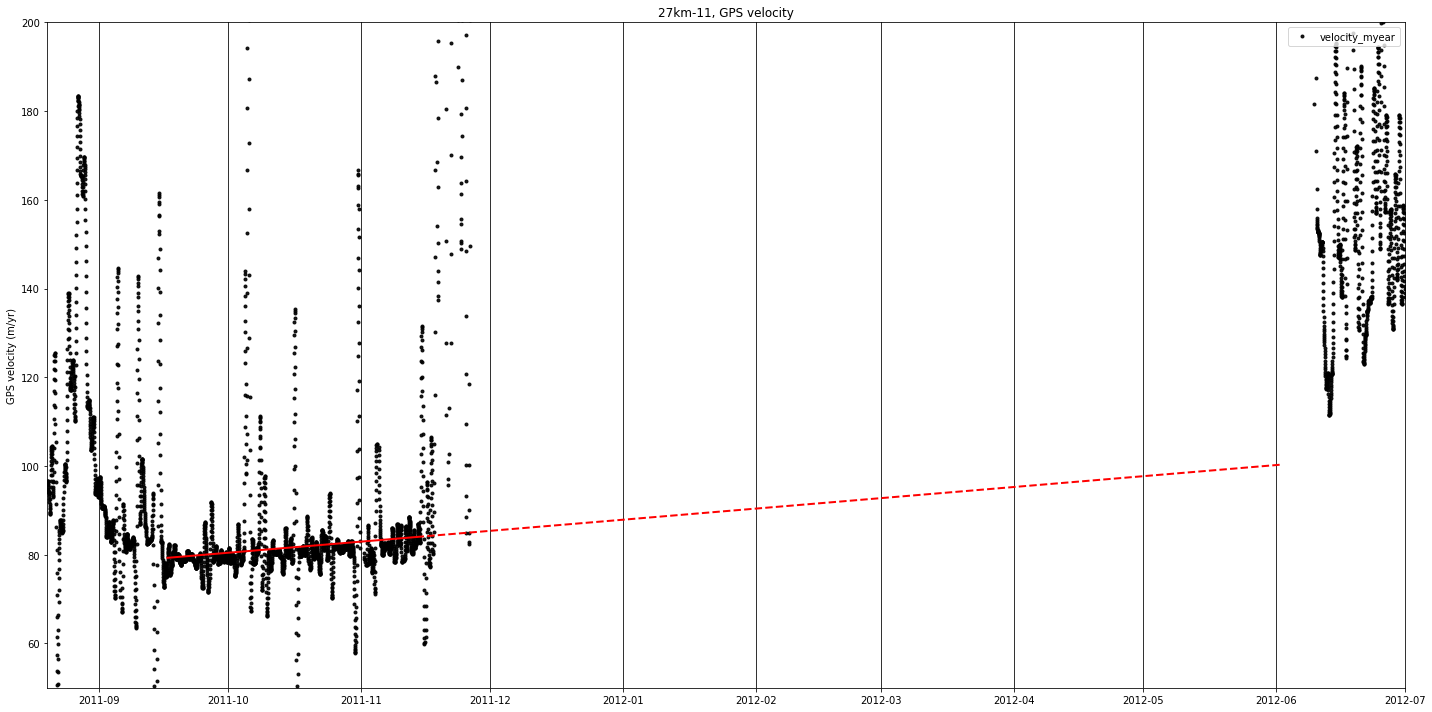

In [95]:
fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index,vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
ax.set_xlim('2011-08-20','2012-07-01')
ax.set_ylim(50,200)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('27km-11, GPS velocity')
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

### Close-up, winter 2012-13

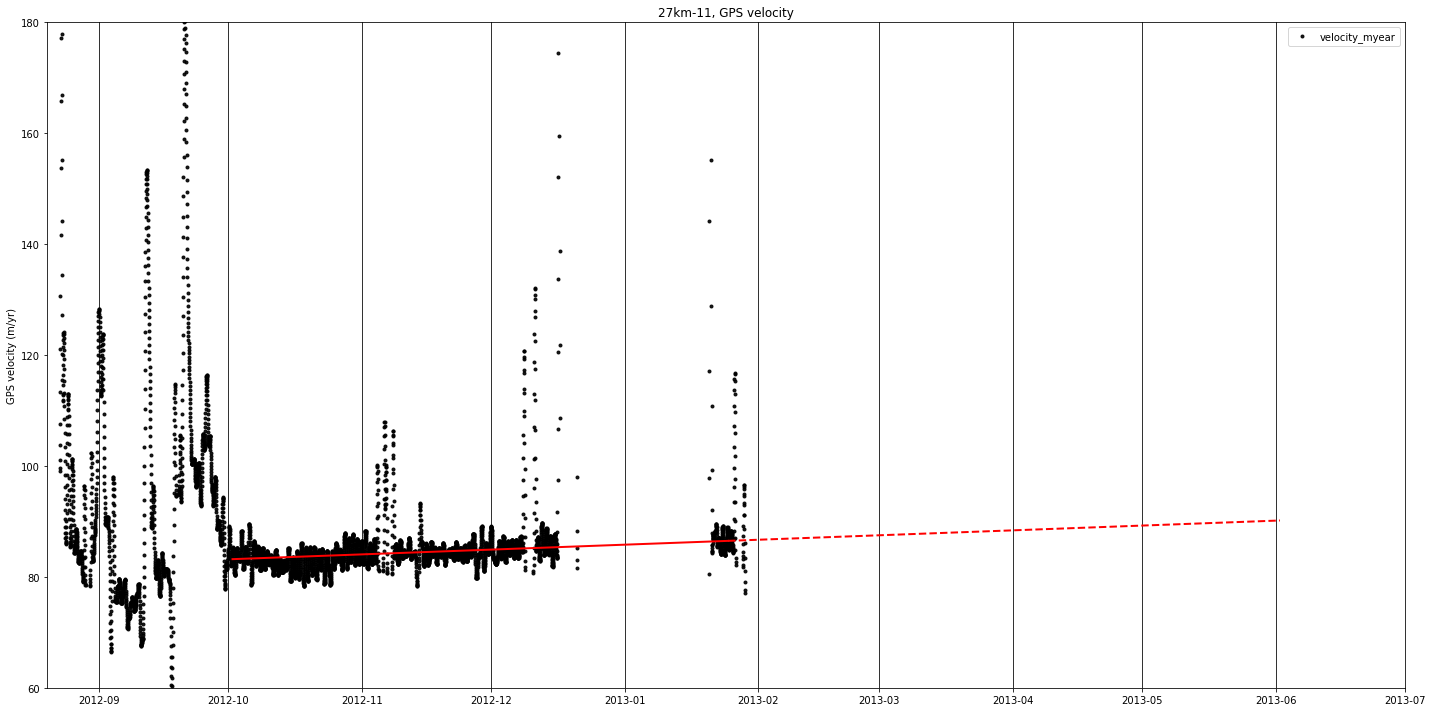

In [96]:
fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index,vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
ax.set_xlim('2012-08-20','2013-07-01')
ax.set_ylim(60,180)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('27km-11, GPS velocity')
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

# 3. Site 46km-11

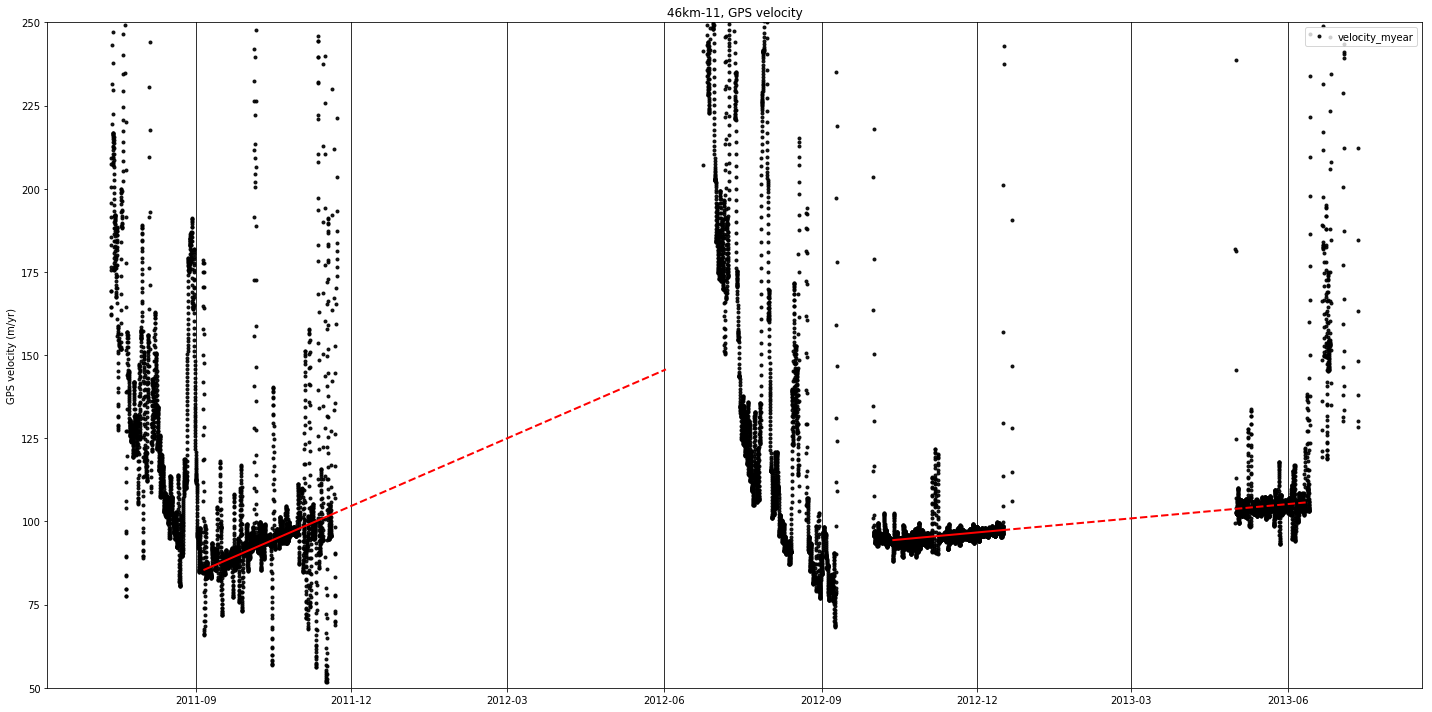

In [97]:
# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

site = '46km-11'

vel1 = pd.read_csv('velocity/processed_winter/46km-11_velocity_winter.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# ------------------------------------------------------------------------------
t1 = pd.to_datetime('2011-09-06')
t2 = pd.to_datetime('2011-11-19')

y1 = 85.5
y2 = 102.

x_1 = [t1, t2]
y_1 = [y1, y2]

m = (y2-y1) / (pd.Timedelta(t2-t1).days)

days_projected = 196
y_projected = m*days_projected + y2

#print ''
#print y_projected

x_proj_1 = [t2, t2 + pd.Timedelta('%s days' %days_projected)]
y_proj_1 = [y2, y_projected]

# -----------------------------------------
t3 = pd.to_datetime('2012-10-13')
t4 = pd.to_datetime('2012-12-16')

y3 = 94.4
y4 = 97.4

x_2 = [t3, t4]
y_2 = [y3, y4]

m = (y4-y3) / (pd.Timedelta(t4-t3).days)

days_projected = 179
y_projected = m*days_projected + y4

#print ''
#print y_projected

x_proj_2 = [t4, t4 + pd.Timedelta('%s days' %days_projected)]
y_proj_2 = [y4, y_projected]

# ------------------------------------------------------------------------------
# VELOCITY PLOTS:
# ------------------------------------------------------------------------------

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index,vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
#ax.set_xlim('2011-08-05','2011-09-25')
ax.set_ylim(50,250)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('46km-11, GPS velocity')
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

### Close-up, fall 2011
The steep linear trend above looks a little extreme, but seems to be a good fit to the fall data... small changes in the initial trajectory for the projection make a big difference for ending velocity in the spring. We'll have to be careful how we use / interpret the projections. The big melt preceeding this winter is the Doyle event! Does this huge late-season melt pulse have something to do with the increased acceleration rate??

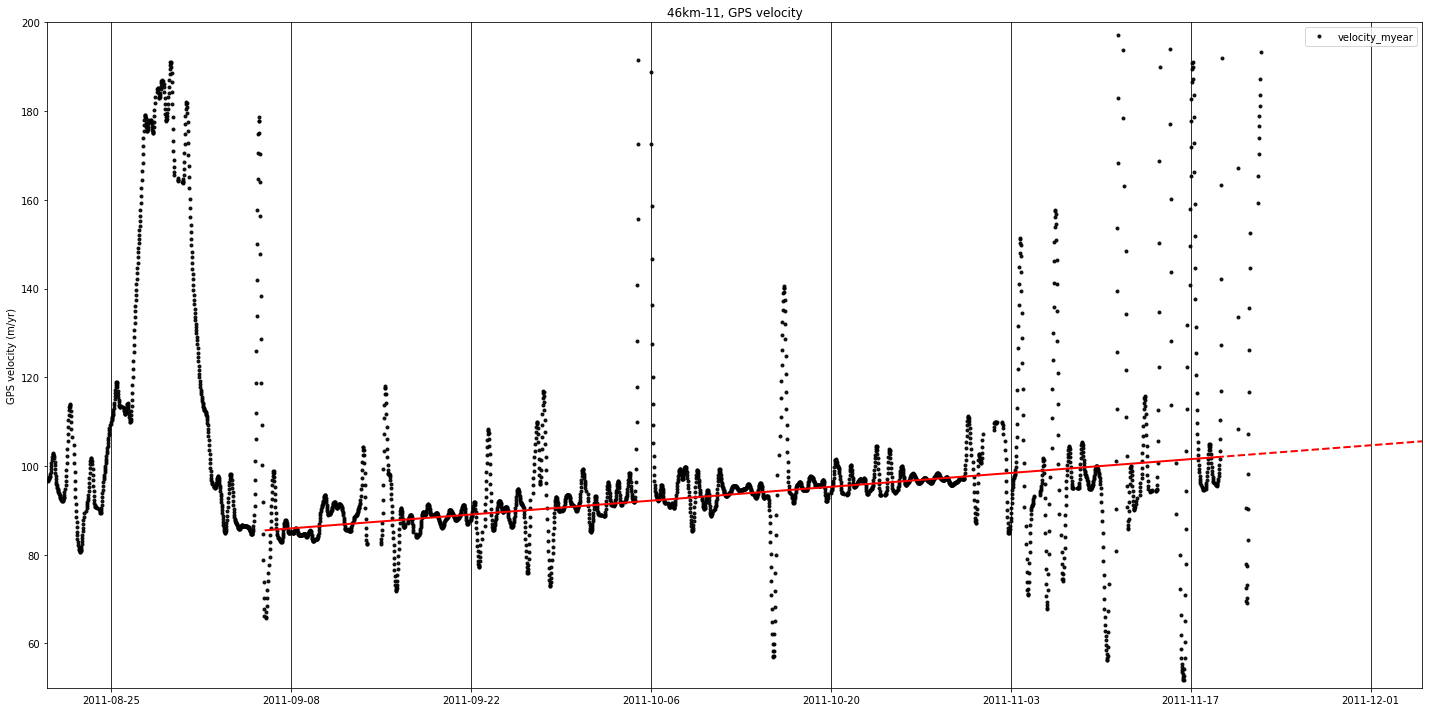

In [98]:
fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index,vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
ax.set_xlim('2011-08-20','2011-12-05')
ax.set_ylim(50,200)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('46km-11, GPS velocity')
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

### Close-up, winter 2012-13

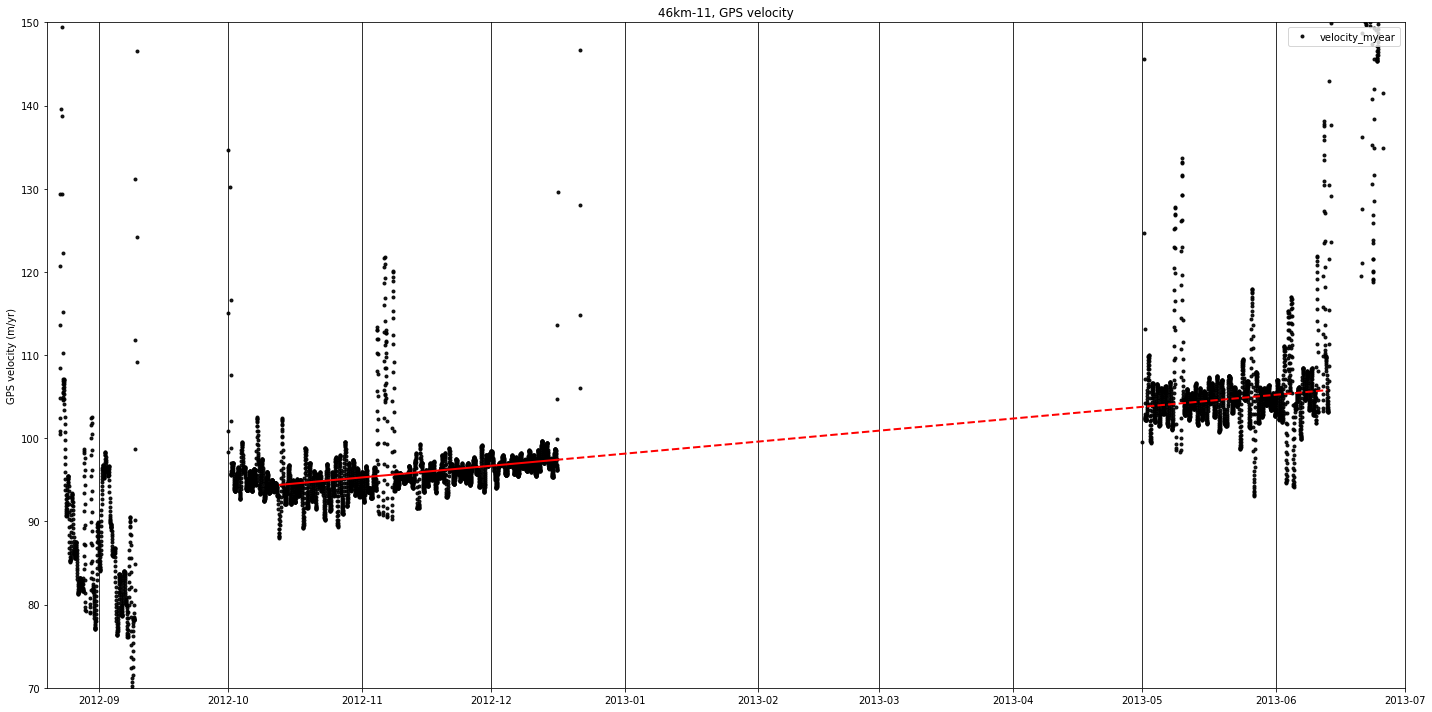

In [99]:
fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index,vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
ax.set_xlim('2012-08-20','2013-07-01')
ax.set_ylim(70,150)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('46km-11, GPS velocity')
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

# 4. Site 27km-12

(Linear trend of spring record projected backwards)

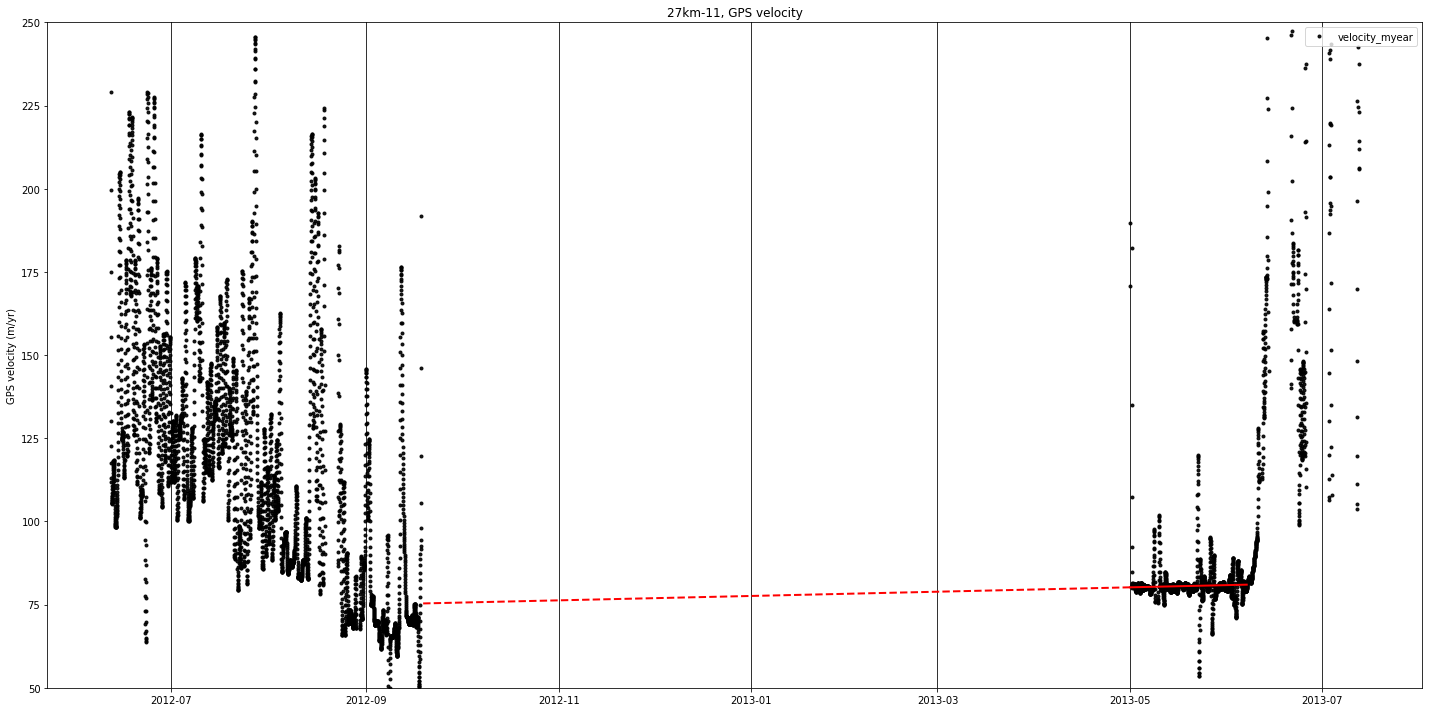

In [100]:
# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

site = '27km-12'

vel1 = pd.read_csv('velocity/processed_winter/27km-12_velocity_winter.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# ------------------------------------------------------------------------------
t1 = pd.to_datetime('2013-06-07')
t2 = pd.to_datetime('2013-05-01')

y1 = 81.
y2 = 80.2

x_1 = [t2, t1]
y_1 = [y2, y1]

m = (y2-y1) / (pd.Timedelta(t1-t2).days)

days_projected = 224
y_projected = m*days_projected + y2

#print ''
#print y_projected

x_proj_1 = [t2, t2 - pd.Timedelta('%s days' %days_projected)]
y_proj_1 = [y2, y_projected]

# ------------------------------------------------------------------------------
# VELOCITY PLOTS:
# ------------------------------------------------------------------------------

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index,vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
#ax.set_xlim('2011-08-05','2011-09-25')
ax.set_ylim(50,250)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('27km-11, GPS velocity')
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

# 5. Site 33km-14 (center)

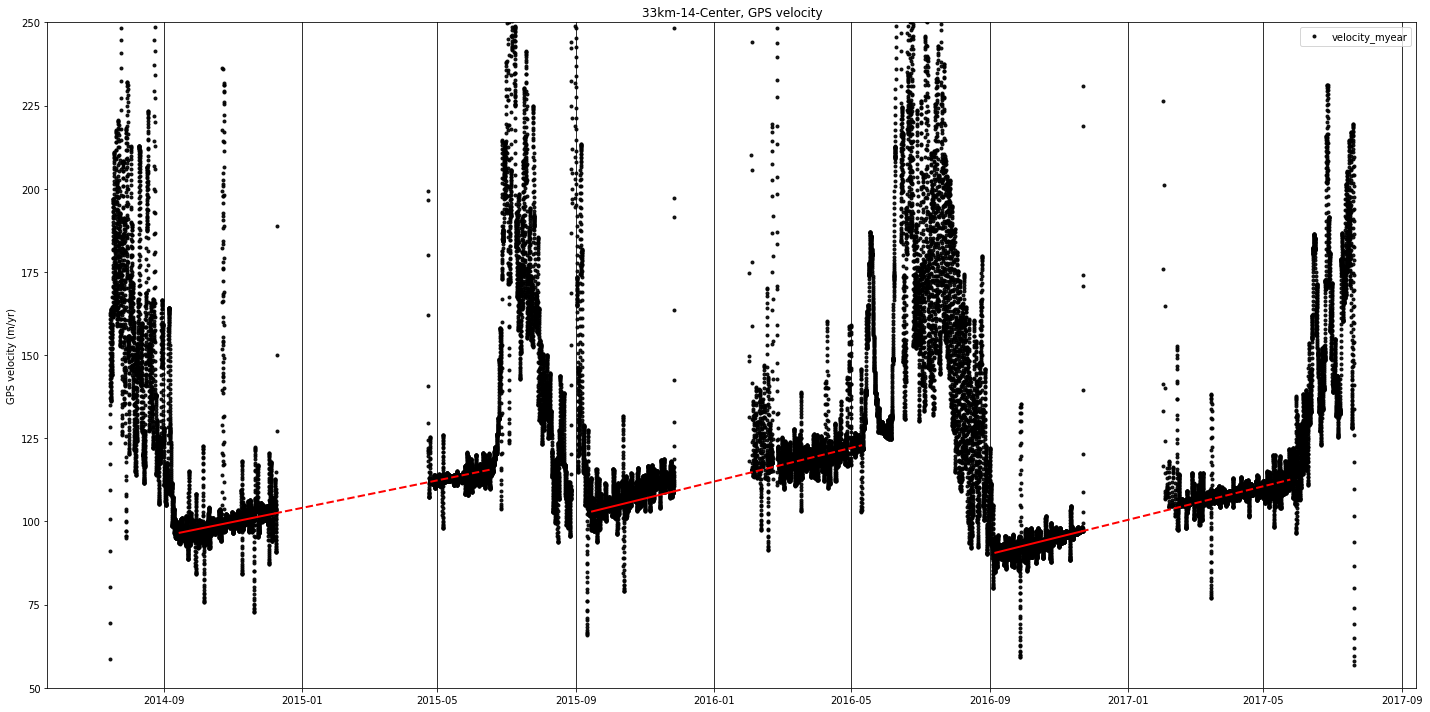

In [101]:
# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

site = '33km-14-Center'

vel1 = pd.read_csv('velocity/processed_winter/33km-14-Center_velocity_winter.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# ------------------------------------------------------------------------------
t1 = pd.to_datetime('2014-09-15')
t2 = pd.to_datetime('2014-12-08')

y1 = 96.6
y2 = 102.4

x_1 = [t1, t2]
y_1 = [y1, y2]

m = (y2-y1) / (pd.Timedelta(t2-t1).days)

days_projected = 192
y_projected = m*days_projected + y2

#print ''
#print y_projected

x_proj_1 = [t2, t2 + pd.Timedelta('%s days' %days_projected)]
y_proj_1 = [y2, y_projected]

# -----------------------------------------
t3 = pd.to_datetime('2015-09-15')
t4 = pd.to_datetime('2015-11-26')

y3 = 103.
y4 = 109.

x_2 = [t3, t4]
y_2 = [y3, y4]

m = (y4-y3) / (pd.Timedelta(t4-t3).days)

days_projected = 167
y_projected = m*days_projected + y4

#print ''
#print y_projected

x_proj_2 = [t4, t4 + pd.Timedelta('%s days' %days_projected)]
y_proj_2 = [y4, y_projected]

# -----------------------------------------
t5 = pd.to_datetime('2016-09-06')
t6 = pd.to_datetime('2016-11-21')

y5 = 90.6
y6 = 97.

x_3 = [t5, t6]
y_3 = [y5, y6]

m = (y6-y5) / (pd.Timedelta(t6-t5).days)

days_projected = 185
y_projected = m*days_projected + y6

#print ''
#print y_projected

x_proj_3 = [t6, t6 + pd.Timedelta('%s days' %days_projected)]
y_proj_3 = [y6, y_projected]

# ------------------------------------------------------------------------------
# VELOCITY PLOTS:
# ------------------------------------------------------------------------------

#majorLocator   = MultipleLocator(1)
#majorFormatter = FormatStrFormatter('%d')
#minorLocator   = MultipleLocator(0.5)

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index, vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)
plt.plot(x_3, y_3, color='r', linewidth=2)
plt.plot(x_proj_3, y_proj_3, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
#ax.set_xlim('2014-07-01','2014-09-25')
ax.set_ylim(50,250)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('%s, GPS velocity' % site )
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

### Close-up, winter 2014-15

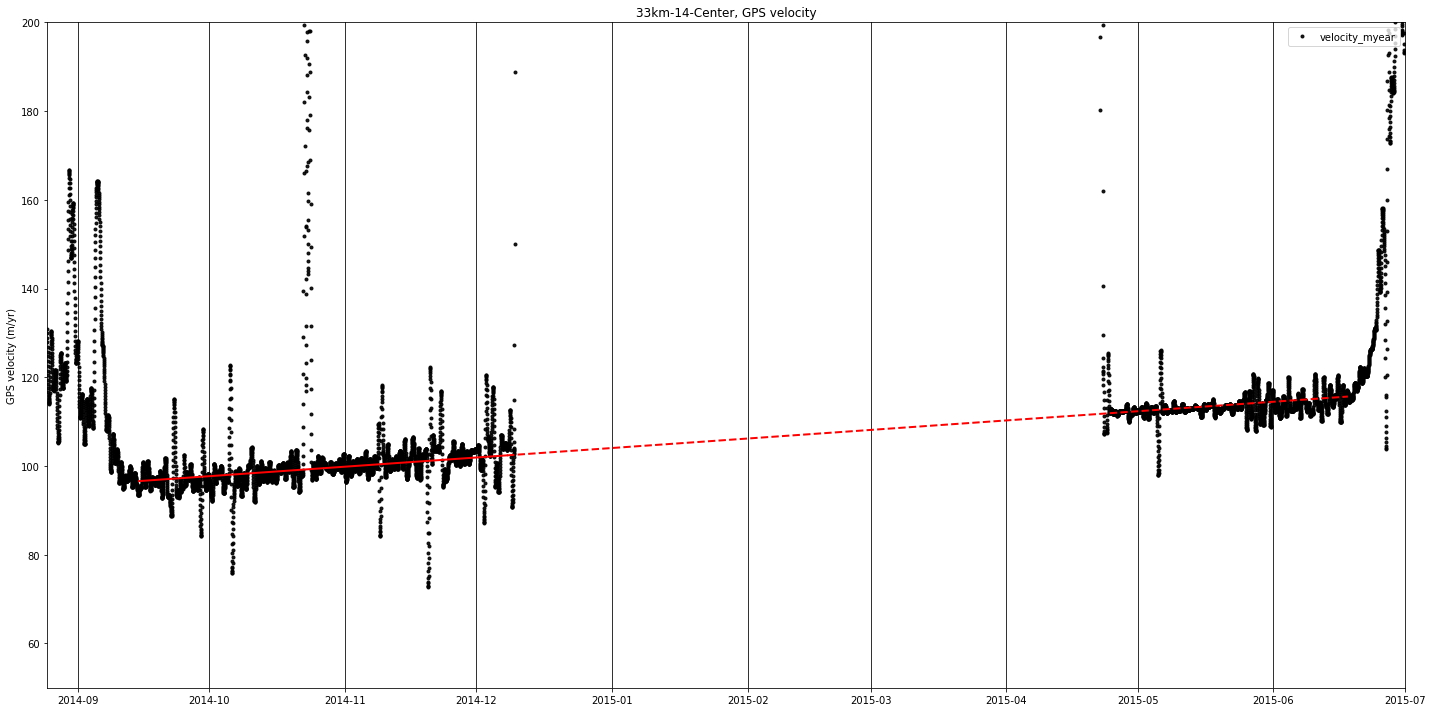

In [102]:
fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index, vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)
plt.plot(x_3, y_3, color='r', linewidth=2)
plt.plot(x_proj_3, y_proj_3, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
ax.set_xlim('2014-08-25','2015-07-01')
ax.set_ylim(50,200)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('%s, GPS velocity' % site )
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

### Close-up, winter 2015-16
(Data doesn't fit linear trend quite as well for this winter...)

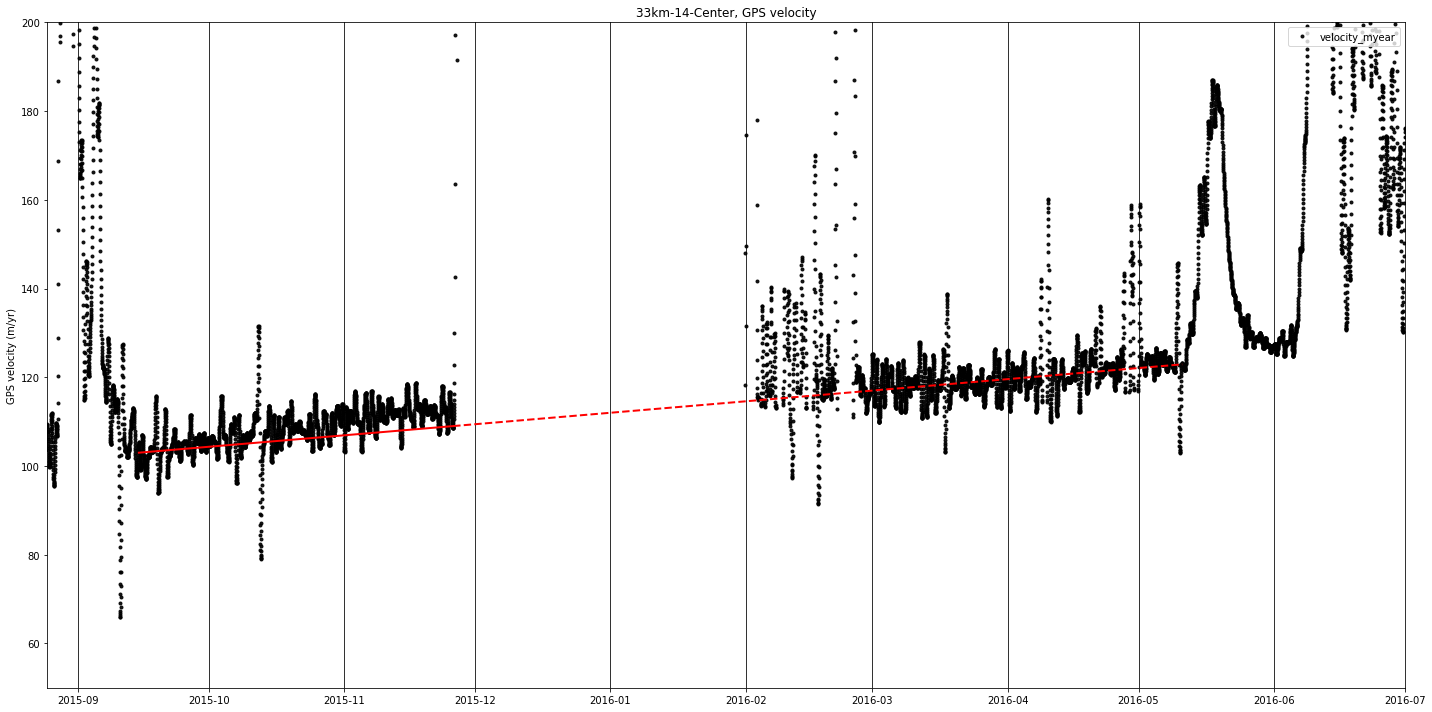

In [103]:
fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index, vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)
plt.plot(x_3, y_3, color='r', linewidth=2)
plt.plot(x_proj_3, y_proj_3, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
ax.set_xlim('2015-08-25','2016-07-01')
ax.set_ylim(50,200)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('%s, GPS velocity' % site )
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)

### Close-up, winter 2016-17

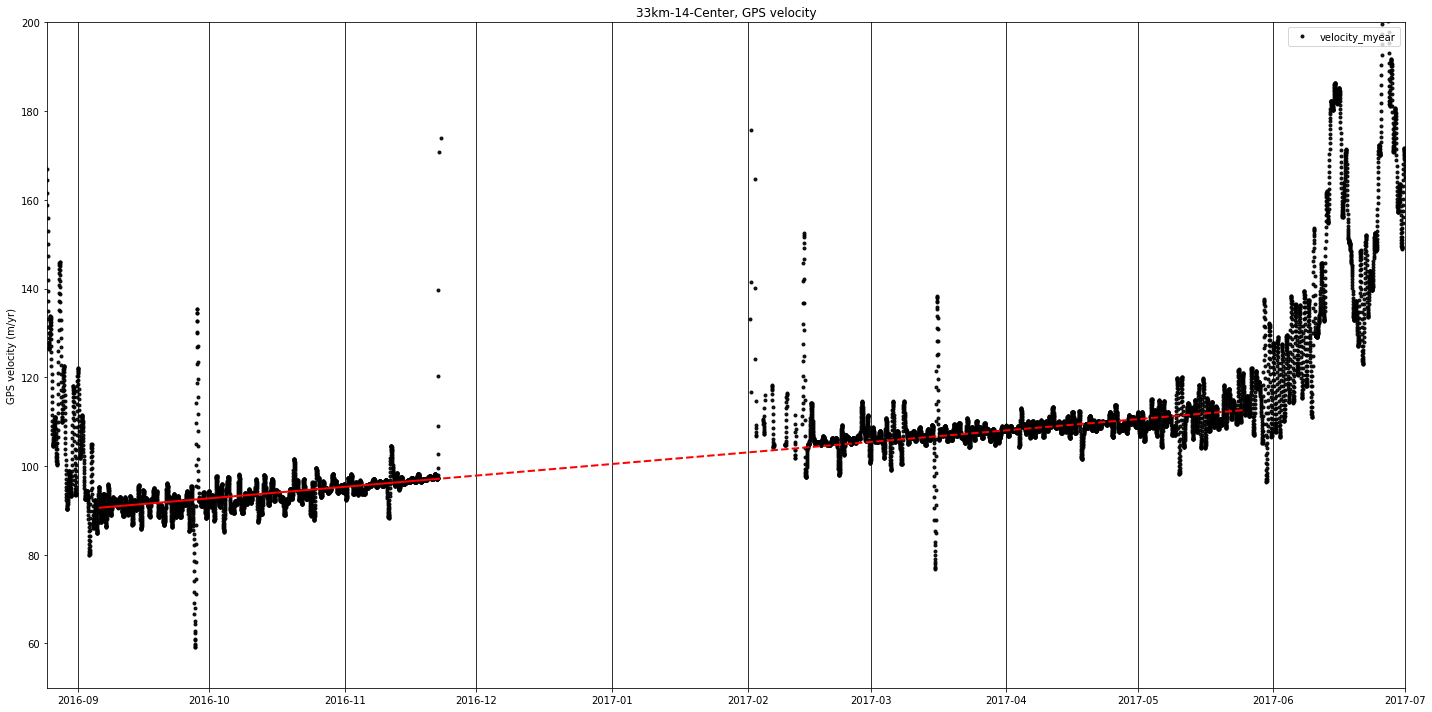

In [104]:
fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.plot(vel1.index, vel1.velocity_myear, 'k.', alpha=0.9)

plt.plot(x_1, y_1, color='r', linewidth=2)
plt.plot(x_proj_1, y_proj_1, color='r', linestyle='--', linewidth=2)
plt.plot(x_2, y_2, color='r', linewidth=2)
plt.plot(x_proj_2, y_proj_2, color='r', linestyle='--', linewidth=2)
plt.plot(x_3, y_3, color='r', linewidth=2)
plt.plot(x_proj_3, y_proj_3, color='r', linestyle='--', linewidth=2)

ax.set_ylabel('GPS velocity (m/yr)')
ax.set_xlim('2016-08-25','2017-07-01')
ax.set_ylim(50,200)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.grid(True, which='major', color='black')
ax.xaxis.grid(True, which='minor', color='gray')
ax.set_title('%s, GPS velocity' % site )
#plt.subplots_adjust(left=0.09, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout()
#plt.subplots_adjust(left=0.06)
plt.legend(loc=1)